In [102]:
import pandas as pd
from io import StringIO
import csv
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import numpy as np
import matplotlib.patches as mpatches
import datetime as dt
pd.options.mode.chained_assignment = None

In [103]:
##Import csv##

path='train.csv'
with open(path) as f:
    reader = csv.reader(f, delimiter=",")
    d = list(reader)

##Import csv END##

In [104]:
##Turn into clean DataFrame##
apidict = {x:list(y) for x,y in zip(d[0], zip(*d[1:]))}
df=pd.DataFrame(apidict)
del df['AnimalID']
del df['Name']
dfdog=df[df.AnimalType=='Dog']
dfdog=dfdog[df.SexuponOutcome!='Unknown']
dfdog=dfdog[df.SexuponOutcome!='']
del dfdog['AnimalType']


C:\Users\Ronak\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\Ronak\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [105]:
##CHANGE AgeuponOutcome into float##

dfdog.loc[dfdog['AgeuponOutcome'].str.contains('1 month'), 'AgeuponOutcome'] = '1'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('2 month'), 'AgeuponOutcome'] = '2'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('3 month'), 'AgeuponOutcome'] = '3'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('4 month'), 'AgeuponOutcome'] = '4'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('5 month'), 'AgeuponOutcome'] = '5'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('6 month'), 'AgeuponOutcome'] = '6'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('7 month'), 'AgeuponOutcome'] = '7'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('8 month'), 'AgeuponOutcome'] = '8'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('9 month'), 'AgeuponOutcome'] = '9'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('10 month'), 'AgeuponOutcome'] = '10'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('11 month'), 'AgeuponOutcome'] = '11'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('0 year'), 'AgeuponOutcome'] = '0.0'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('1 year'), 'AgeuponOutcome'] = '12'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('2 year'), 'AgeuponOutcome'] = '24'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('3 year'), 'AgeuponOutcome'] = '36'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('4 year'), 'AgeuponOutcome'] = '48'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('5 year'), 'AgeuponOutcome'] = '60'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('6 year'), 'AgeuponOutcome'] = '72'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('7 year'), 'AgeuponOutcome'] = '84'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('8 year'), 'AgeuponOutcome'] = '96'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('9 year'), 'AgeuponOutcome'] = '108'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('10 year'), 'AgeuponOutcome'] = '120'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('11 year'), 'AgeuponOutcome'] = '132'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('12 year'), 'AgeuponOutcome'] = '144'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('13 year'), 'AgeuponOutcome'] = '156'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('14 year'), 'AgeuponOutcome'] = '168'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('15 year'), 'AgeuponOutcome'] = '180'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('16 year'), 'AgeuponOutcome'] = '192'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('day'), 'AgeuponOutcome'] = '0.03'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('1 week'), 'AgeuponOutcome'] = '0.25'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('2 week'), 'AgeuponOutcome'] = '0.50'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('3 week'), 'AgeuponOutcome'] = '0.75'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('4 week'), 'AgeuponOutcome'] = '1'
dfdog.loc[dfdog['AgeuponOutcome'].str.contains('5 week'), 'AgeuponOutcome'] = '1.25'
dfdog.loc[dfdog['DateTime'].str.contains('2016-02-20 16:37:00'), 'AgeuponOutcome'] = '0.0'

dfdog.AgeuponOutcome=dfdog.AgeuponOutcome.astype(float)

##END STRING TO FLOAT CONVERSION##


In [106]:
suo_count=pd.Series(dfdog['SexuponOutcome']).value_counts()
outcome_count=pd.Series(dfdog['OutcomeType']).value_counts()
breed_count=pd.Series(dfdog['Breed']).value_counts()
adopted=dfdog[dfdog.OutcomeType=='Adoption']
suoa_count=pd.Series(adopted['SexuponOutcome']).value_counts()

dfdog.columns=['Date_Time','Outcome_type','Outcome_subtype','Sex_upon_Outcome','Age_upon_Outcome (Months)','Breed','Color']
adopted.columns=['Date_Time','Outcome_type','Outcome_subtype','Sex_upon_Outcome','Age_upon_Outcome (Months)','Breed','Color']
del dfdog['Outcome_subtype']

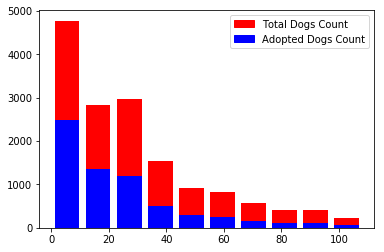

In [108]:
##
all_hist = plt.hist(dfdog['Age_upon_Outcome (Months)'], rwidth=0.8,color='red')
adopted_hist = plt.hist(adopted['Age_upon_Outcome (Months)'], bins=all_hist[1], rwidth=0.8,color='blue')
red_patch = mpatches.Patch(color='red', label='Total Dogs Count')
blue_patch = mpatches.Patch(color='blue', label='Adopted Dogs Count')
plt.legend(handles=[red_patch,blue_patch])
plt.show()
##

# Dog Adoption by Age
### The histogram above shows that younger dogs have a higher adoption ratio compared to older dogs.

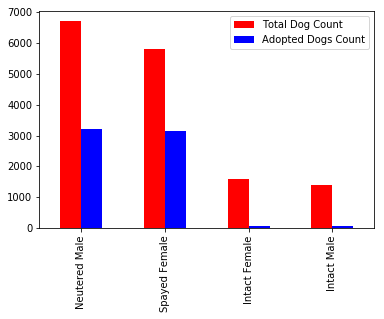

In [109]:
df = pd.DataFrame(np.c_[suo_count.tolist(),suoa_count.tolist()], index=suoa_count.keys().tolist())
ax=df.plot(kind='bar',color='rb')
ax.legend(['Total Dog Count','Adopted Dogs Count'])
plt.show()

# Fixed Dogs vs Intact Dogs
### The above barplot shows that Neutered/Spayed Dogs have a higher adoption ratio compared to Intact Dogs.

In [111]:
dfdog['Date_Time'] = pd.to_datetime(dfdog['Date_Time'])
dfdog['Date'], dfdog['Time'] = dfdog['Date_Time'].dt.normalize(), dfdog['Date_Time'].dt.time

In [112]:
del dfdog['Date_Time']

In [113]:
adopted['Date_Time'] = pd.to_datetime(adopted['Date_Time'])
adopted['Date'], adopted['Time'] = adopted['Date_Time'].dt.normalize(), adopted['Date_Time'].dt.time

In [114]:
del adopted['Outcome_subtype']
adopted.sort_values('Date_Time')

,Date_Time,Outcome_type,Sex_upon_Outcome,Age_upon_Outcome (Months),Breed,Color,Date,Time
5000,2013-10-01 09:31:00,Adoption,Neutered Male,2.0,Labrador Retriever Mix,Black,2013-10-01,09:31:00
5287,2013-10-01 17:02:00,Adoption,Neutered Male,8.0,Labrador Retriever Mix,Brown,2013-10-01,17:02:00
22912,2013-10-01 17:18:00,Adoption,Spayed Female,2.0,German Shepherd Mix,Black/Tan,2013-10-01,17:18:00
19805,2013-10-01 18:24:00,Adoption,Spayed Female,2.0,German Shepherd Mix,Black/Tan,2013-10-01,18:24:00
12498,2013-10-02 12:40:00,Adoption,Spayed Female,24.0,Norfolk Terrier Mix,Tan,2013-10-02,12:40:00
21307,2013-10-02 16:09:00,Adoption,Neutered Male,12.0,Pit Bull Mix,Black/White,2013-10-02,16:09:00
17176,2013-10-02 17:16:00,Adoption,Neutered Male,12.0,Yorkshire Terrier Mix,Silver/Brown,2013-10-02,17:16:00
270,2013-10-02 17:43:00,Adoption,Neutered Male,12.0,Chihuahua Longhair Mix,Black,2013-10-02,17:43:00
20893,2013-10-02 17:47:00,Adoption,Neutered Male,1.0,Siberian Husky/German Shepherd,Buff,2013-10-02,17:47:00
6176,2013-10-02 18:16:00,Adoption,Spayed Female,24.0,Glen Of Imaal Mix,Black,2013-10-02,18:16:00


In [115]:
adopted['Date_Time']=pd.to_datetime(adopted['Date_Time'])
adopted=adopted.set_index('Date_Time')

In [116]:
adopted.index

DatetimeIndex(['2015-01-31 12:28:00', '2014-02-04 17:17:00',
               '2014-05-03 07:48:00', '2013-11-04 14:48:00',
               '2016-02-03 11:27:00', '2015-08-15 14:22:00',
               '2013-10-28 16:32:00', '2016-01-15 17:31:00',
               '2015-03-25 18:50:00', '2015-03-09 17:57:00',
               ...
               '2014-03-16 17:19:00', '2014-09-30 18:34:00',
               '2015-12-18 19:13:00', '2014-02-01 14:09:00',
               '2015-10-24 00:00:00', '2015-08-05 17:03:00',
               '2015-05-02 21:04:00', '2015-04-28 14:26:00',
               '2016-01-29 18:52:00', '2015-03-09 13:33:00'],
              dtype='datetime64[ns]', name='Date_Time', length=6497, freq=None)

In [117]:
month_count = adopted.groupby(pd.Grouper(freq="M"))['Outcome_type'].value_counts()

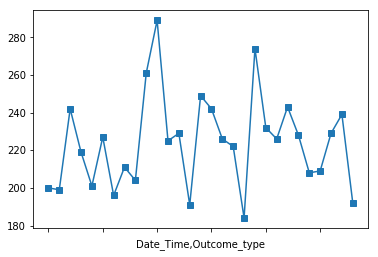

In [119]:
month_count.plot(marker='s')

In [121]:
seasonal_data={'Fall 2013':((test[11]+test[23])/2)+test[0]+test[1],
               'Winter 2013-2014':test[2]+test[3]+test[4],
               'Spring 2014':test[5]+test[6]+test[7],
               'Summer 2014':test[8]+test[9]+test[10],
               'Fall 2014':test[11]+test[12]+test[13],
               'Winter 2014-2015':test[14]+test[15]+test[16],
               'Spring 2015':test[17]+test[18]+test[19],
               'Summer 2015':test[20]+test[21]+test[22],
               'Fall 2015':test[23]+test[24]+test[25],
               'Winter 2015-2016':test[26]+test[27]+test[28]}

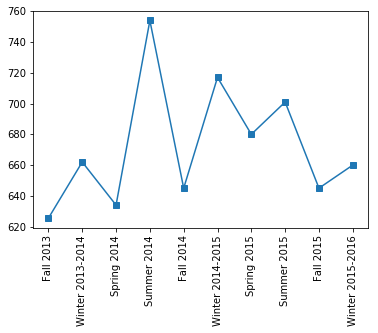

In [122]:
lists = seasonal_data.items() # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y,marker='s')
plt.xticks(rotation=90)
plt.show()

# Seasonal Adoption Time Plot
### The above line plot shows the amount of dogs adopted for each season of the year from Fall 2013 to Winter 2014-2015.  There is a seasonal trend in this plot, the dog adoption count increases in the Winter and Summer seasons and drops in the Spring and Fall seasons.

In [123]:
Weekly_plot = adopted.groupby(pd.Grouper(freq="W"))['Outcome_type'].value_counts()

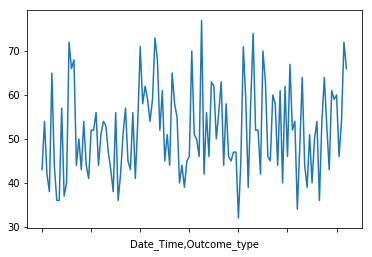

In [124]:
Weekly_plot.plot()